In this notebook I will be completing a test of Simulation Scenario 1. To begin let us load the x and y data that I collected from the R package.

In [3]:
import pandas as pd

datax = pd.read_csv("data/sim1/sim_datax.csv")
datay = pd.read_csv("data/sim1/sim_datay.csv")


Now I will plot the raw X and Y data found in the files.

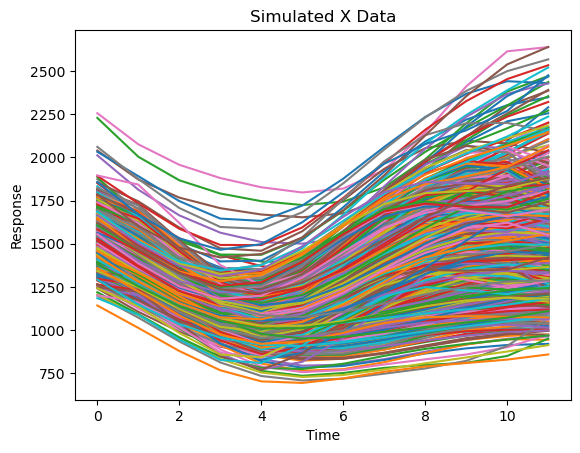

In [4]:
import matplotlib.pyplot as plt

for row in datax.values:
    plt.plot(row)
plt.title("Simulated X Data")
plt.xlabel("Time")
plt.ylabel("Response")
plt.show()

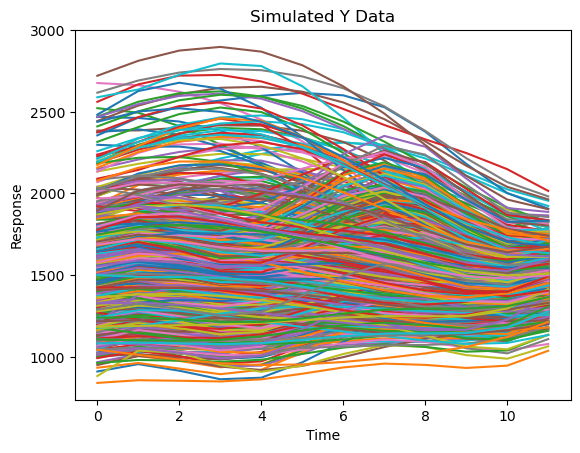

In [5]:
for row in datay.values:
    plt.plot(row)

plt.title("Simulated Y Data")
plt.xlabel("Time")
plt.ylabel("Response")
plt.show()

Now I will take our data and convert it to functional data using a BSpline with 6 basis functions. The domain for our predictor variable is [0, 12], and for our response variable is [12, 24].

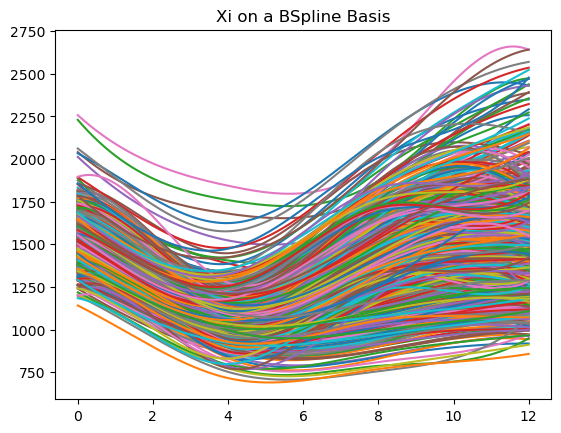

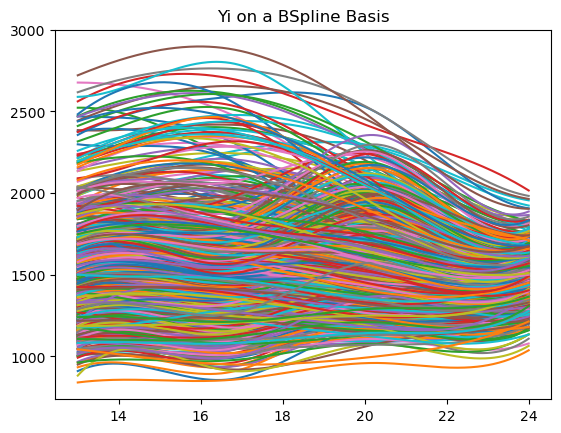

In [12]:
from skfda.representation import FDataGrid
from skfda.representation.basis import BSplineBasis
import numpy as np
predictor_grid = np.linspace(0, 12, 12)
response_grid = np.linspace(13, 24, 12)

predictor_bspline = FDataGrid(data_matrix=datax.values, grid_points=predictor_grid).to_basis(BSplineBasis(n_basis=6))
response_bspline = FDataGrid(data_matrix=datay.values, grid_points=response_grid).to_basis(BSplineBasis(n_basis=6))

predictor_bspline.plot()
plt.title("Xi on a BSpline Basis")
plt.show()

response_bspline.plot()
plt.title("Yi on a BSpline Basis")
plt.show()

FunWeightClust:   4.8 mins  |  Approx. remaining:       0.0 secs  |    100% complete 

         Model ModelY  K Threshold Complexity          BIC
1    AKJBKQKDK    VVI  2     0.005      63.00  -140,978.21
2    AKJBKQKDK    EVI  2     0.005      59.00  -141,387.15
3     AKJBQKDK    EVI  2     0.005      61.00  -141,426.86
4     AKJBQKDK    EVI  2     0.005      61.00  -141,426.86
5     AKJBQKDK    EVI  2     0.005      61.00  -141,426.86
..         ...    ... ..       ...        ...          ...
716    ABKQKDK    VII  2     0.005      46.00  -151,024.73
717    ABKQKDK    VII  2     0.005      46.00  -151,066.96
718    AKBQKDK    VII  2     0.005      47.00  -151,086.62
719    ABKQKDK    VII  2     0.005      46.00  -151,142.11
720    ABKQKDK    EII  2     0.005      47.00  -151,465.19

[720 rows x 6 columns]

Selected model AKJBKQKDK-VVI with 2 clusters

Selection Criterion: bic



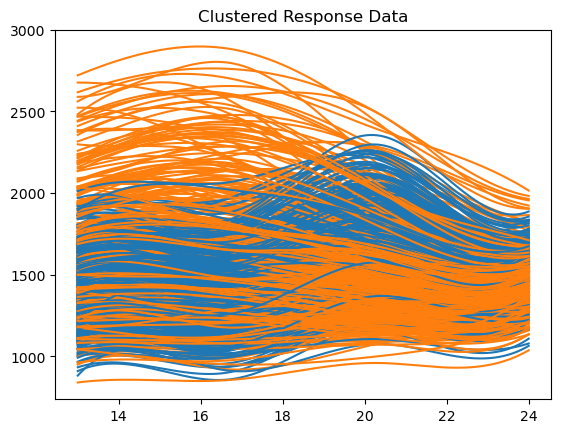

In [13]:
import funweightclust as fwc

models = ["AKJBQKDK"]
modelsy = ["EII", "VII"]

res = fwc.funweightclust(predictor_bspline, response_bspline, 2, model=models, modely=modelsy, nb_rep=1, threshold=0.005)
response_bspline.plot(group = res.cl)
plt.title("Clustered Response Data")
plt.show()